<a href="https://colab.research.google.com/github/ambatitarunsrisai-DA/BMW-Worldwide-Sales-Records-2010-2024-Data-Analysis-Visualization/blob/main/BMW_Worldwide_Sales_Records_(2010%E2%80%932024)_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Interactive visuals
import plotly.express as px
import plotly.graph_objects as go

# For filters and dashboard-like exploration
from ipywidgets import interact, widgets

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")


In [2]:
from google.colab import files
uploaded = files.upload()

# Replace 'laptop_data.csv' with your file name
df = pd.read_csv("BMW sales data (2010 to 24).csv")

Saving BMW sales data (2010 to 24).csv to BMW sales data (2010 to 24).csv


In [3]:
# Basic info
df.info()

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Handle missing data
df['Color'].fillna('Unknown', inplace=True)
df['Fuel_Type'].fillna(df['Fuel_Type'].mode()[0], inplace=True)
df['Transmission'].fillna(df['Transmission'].mode()[0], inplace=True)
df['Price_USD'].fillna(df['Price_USD'].median(), inplace=True)
df['Sales_Volume'].fillna(0, inplace=True)

# Convert Year to integer
df['Year'] = df['Year'].astype(int)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Confirm changes
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB

Missing Values:
 Model                   0
Year                    0
Region                  0
Color                   0
Fuel_Type               0
Transmission      

/tmp/ipython-input-175796461.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Color'].fillna('Unknown', inplace=True)
/tmp/ipython-input-175796461.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
count,50000,50000.000000,50000,50000,50000,50000,50000.000000,50000.000000,50000.000000,50000.000000,50000
unique,11,NaN,6,6,4,2,NaN,NaN,NaN,NaN,2
top,7 Series,NaN,Asia,Red,Hybrid,Manual,NaN,NaN,NaN,NaN,Low
freq,4666,NaN,8454,8463,12716,25154,NaN,NaN,NaN,NaN,34754
mean,NaN,2017.015700,NaN,NaN,NaN,NaN,3.247180,100307.203140,75034.600900,5067.514680,NaN
std,NaN,4.324459,NaN,NaN,NaN,NaN,1.009078,57941.509344,25998.248882,2856.767125,NaN
min,NaN,2010.000000,NaN,NaN,NaN,NaN,1.500000,3.000000,30000.000000,100.000000,NaN
25%,NaN,2013.000000,NaN,NaN,NaN,NaN,2.400000,50178.000000,52434.750000,2588.000000,NaN
50%,NaN,2017.000000,NaN,NaN,NaN,NaN,3.200000,100388.500000,75011.500000,5087.000000,NaN
75%,NaN,2021.000000,NaN,NaN,NaN,NaN,4.100000,150630.250000,97628.250000,7537.250000,NaN


In [4]:
print("Dataset Shape:", df.shape)
print("\nUnique Models:", df['Model'].nunique())
print("\nFuel Types:\n", df['Fuel_Type'].value_counts())


Dataset Shape: (50000, 11)

Unique Models: 11

Fuel Types:
 Fuel_Type
Hybrid      12716
Petrol      12550
Electric    12471
Diesel      12263
Name: count, dtype: int64


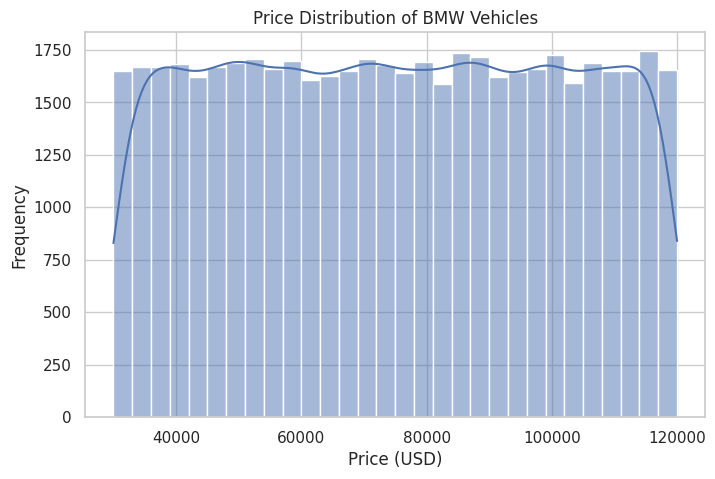

In [5]:
plt.figure(figsize=(8,5))
sns.histplot(df['Price_USD'], bins=30, kde=True)
plt.title('Price Distribution of BMW Vehicles')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()



/tmp/ipython-input-2803409232.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Fuel_Type', y='Price_USD', data=df, estimator=np.mean, palette='coolwarm')


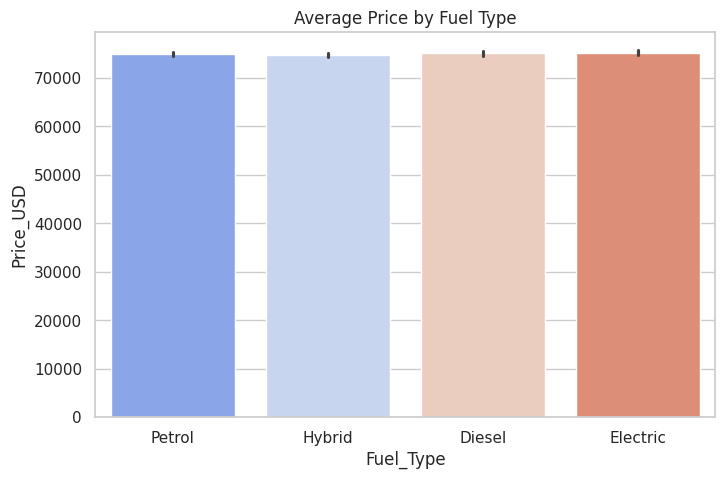

In [6]:
plt.figure(figsize=(8,5))
sns.barplot(x='Fuel_Type', y='Price_USD', data=df, estimator=np.mean, palette='coolwarm')
plt.title('Average Price by Fuel Type')
plt.show()


/tmp/ipython-input-3200170514.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Sales_Volume', data=df, estimator=np.mean, palette='viridis')


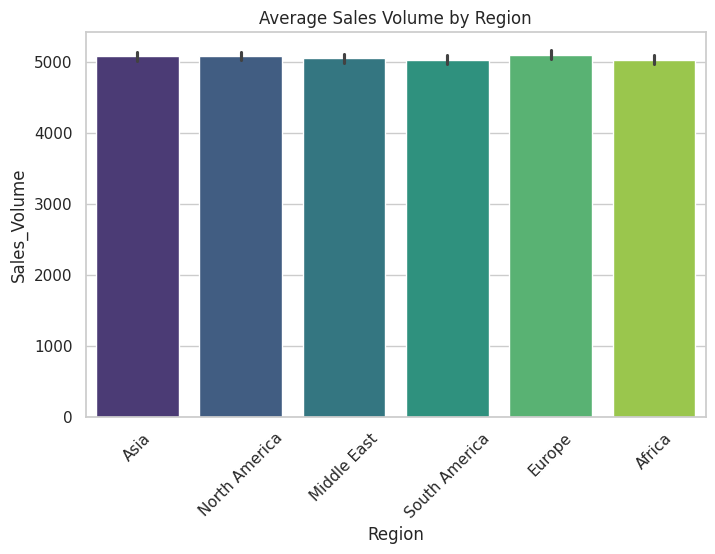

In [7]:
plt.figure(figsize=(8,5))
sns.barplot(x='Region', y='Sales_Volume', data=df, estimator=np.mean, palette='viridis')
plt.title('Average Sales Volume by Region')
plt.xticks(rotation=45)
plt.show()


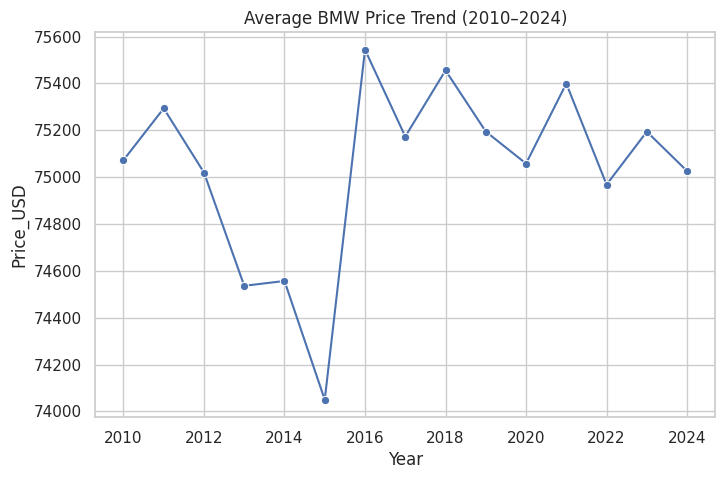

In [8]:
avg_price = df.groupby('Year')['Price_USD'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.lineplot(x='Year', y='Price_USD', data=avg_price, marker='o')
plt.title('Average BMW Price Trend (2010–2024)')
plt.show()


In [9]:
fig = px.bar(df.groupby('Year', as_index=False).sum(),
             x='Year', y='Sales_Volume',
             title='Total BMW Sales Volume by Year')
fig.show()


In [10]:
print("✅ Insights Summary:\n")

print(f"1️⃣ Total Models Analyzed: {df['Model'].nunique()}")
print(f"2️⃣ Most Common Fuel Type: {df['Fuel_Type'].mode()[0]}")
print(f"3️⃣ Average BMW Price: ${df['Price_USD'].mean():,.0f}")
print(f"4️⃣ Region with Highest Sales: {df.groupby('Region')['Sales_Volume'].sum().idxmax()}")
print(f"5️⃣ Best-Selling Year: {df.groupby('Year')['Sales_Volume'].sum().idxmax()}")


✅ Insights Summary:

1️⃣ Total Models Analyzed: 11
2️⃣ Most Common Fuel Type: Hybrid
3️⃣ Average BMW Price: $75,035
4️⃣ Region with Highest Sales: Asia
5️⃣ Best-Selling Year: 2022


In [11]:
df.to_csv('BMW_Cleaned_Data.csv', index=False)
print("Clean dataset saved successfully ✅")


Clean dataset saved successfully ✅
